A colour histogram h(.) can be generated by counting how many times each colour occurs in an image.
Histogram intersection can be used to match a pair of histograms. Given a pair of histograms, e.g., of an
input image I and a model M, each containing n bins, the intersection of the histograms is defined as  
∑ min[h(Ij), h(Mj)]
n
j=1
. 

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

a) Write a histogram function that returns the colour histogram of an input image. Visualize the histogram
and save the corresponding figure. For a given video sequence, use the above function to construct
the histogram of each frame.

In [2]:
def ICV_histogram(image, bins):
    #creating emppty array to store pixel count values
    red_hist = np.zeros((bins.shape[0]))
    green_hist = np.zeros((bins.shape[0]))
    blue_hist = np.zeros((bins.shape[0]))
    

    for i in range(bins.shape[0]):
        red_hist[i] = np.sum(image[:,:,0]==i)  
        green_hist[i] = np.sum(image[:,:,1]==i)
        blue_hist[i] = np.sum(image[:,:,2]==i)
    
    return red_hist.ravel(),green_hist.ravel(),blue_hist.ravel()


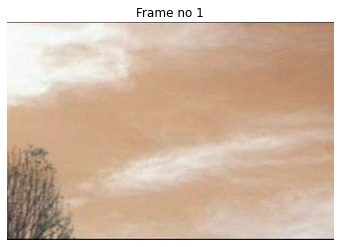

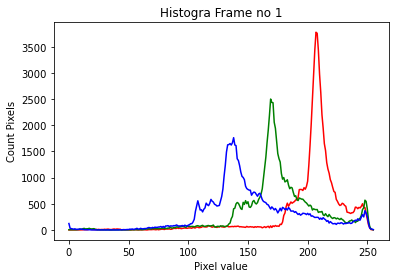

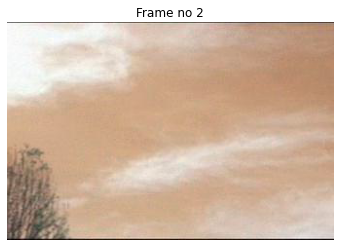

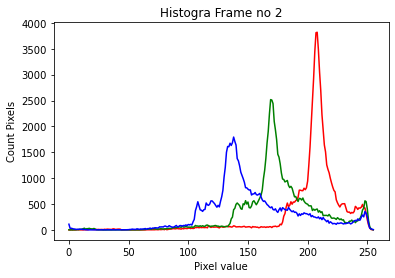

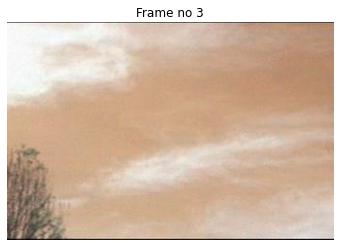

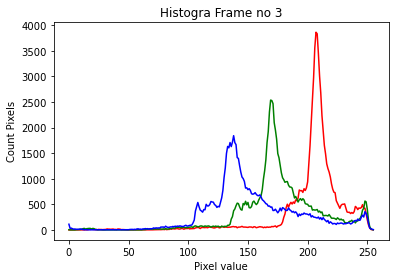

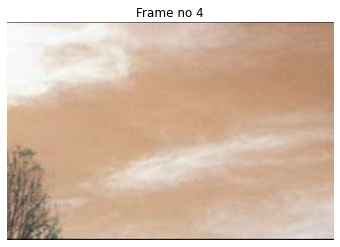

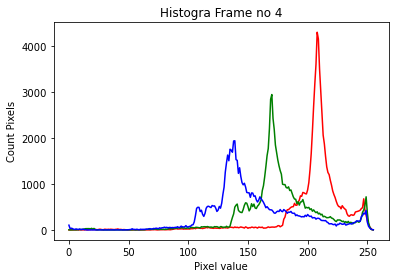

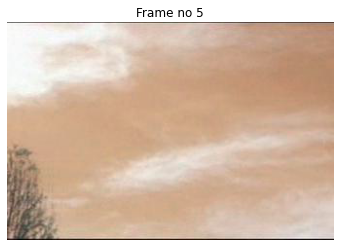

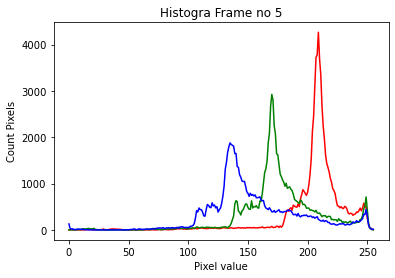

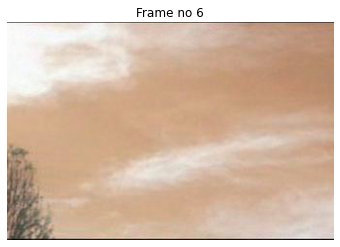

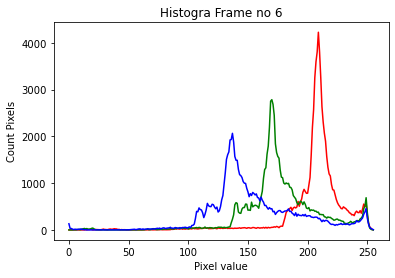

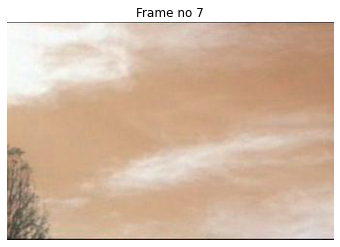

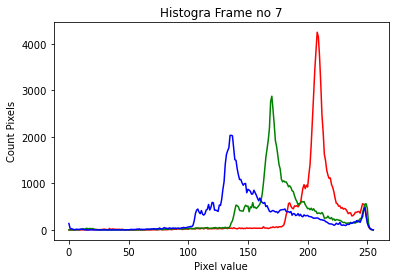

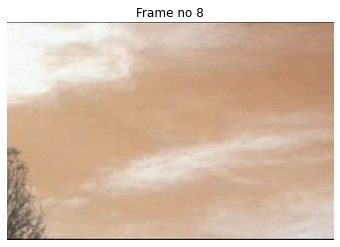

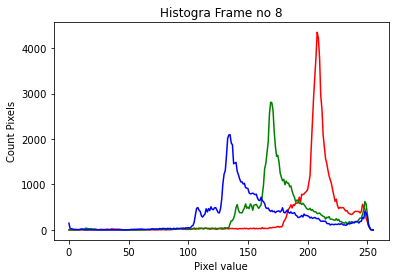

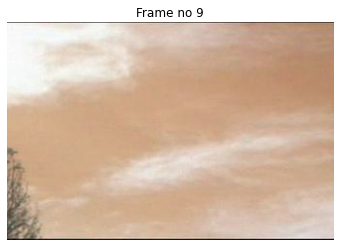

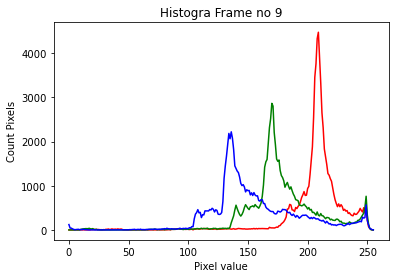

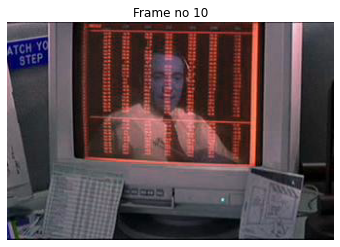

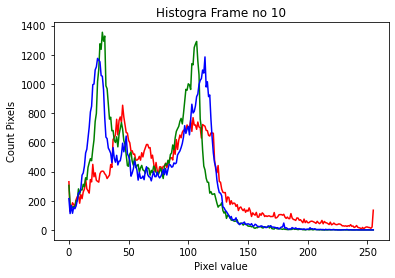

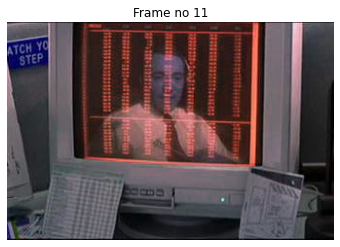

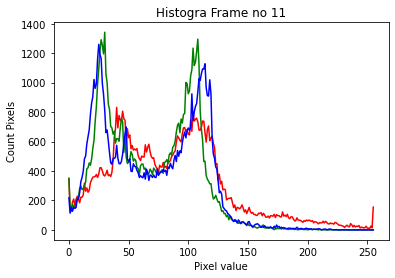

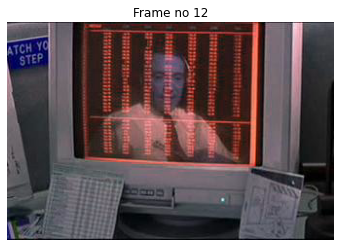

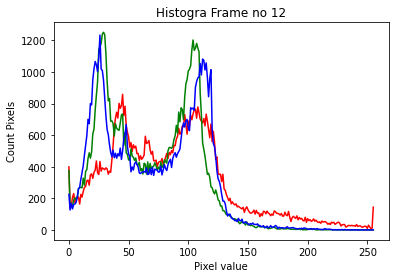

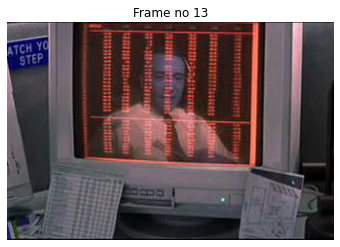

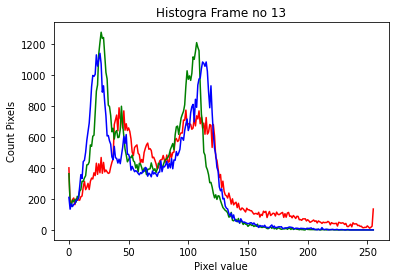

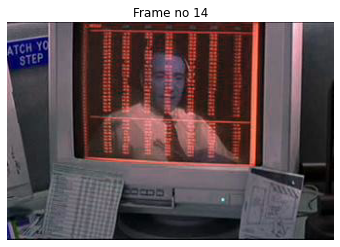

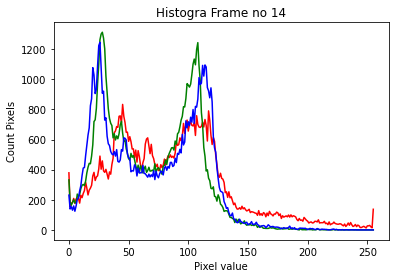

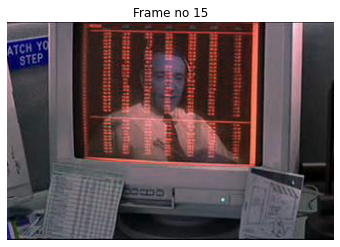

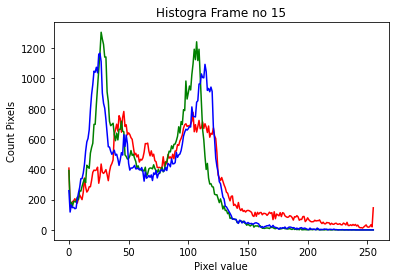

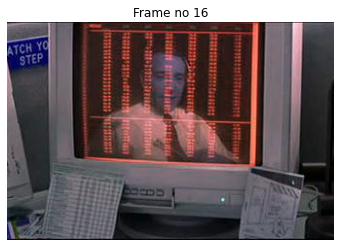

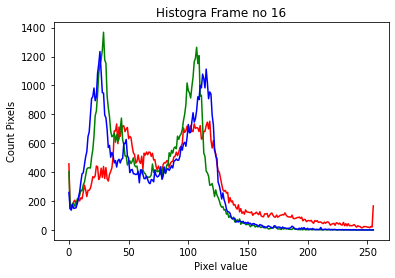

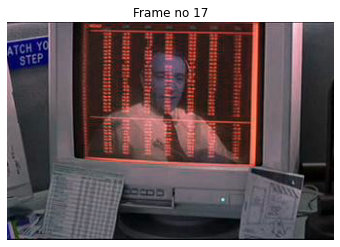

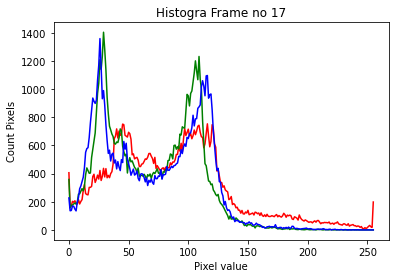

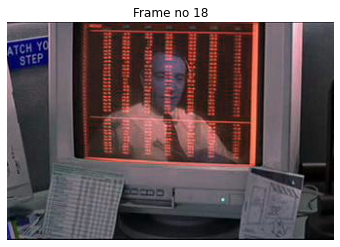

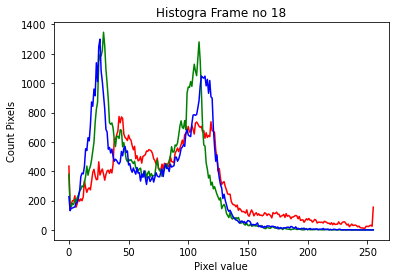

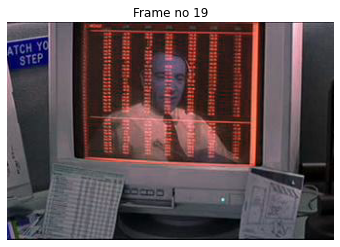

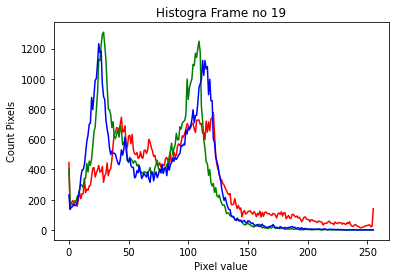

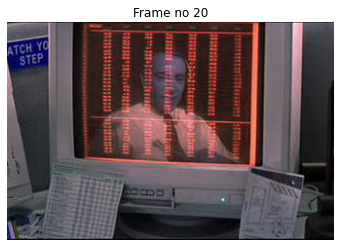

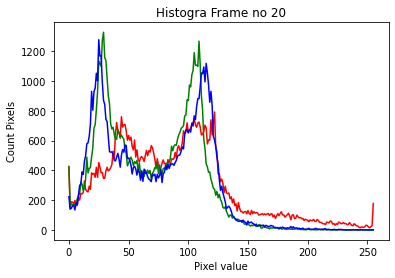

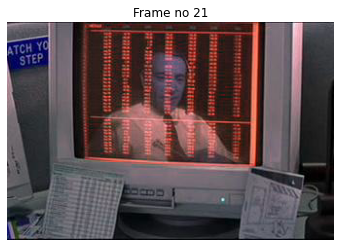

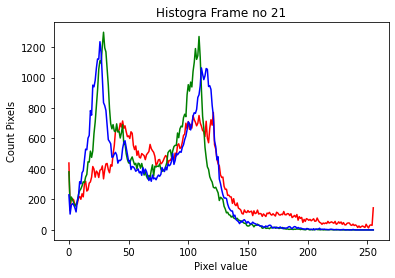

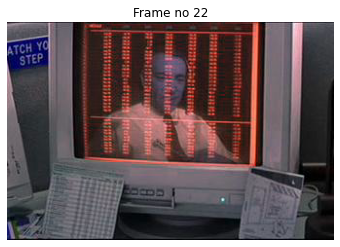

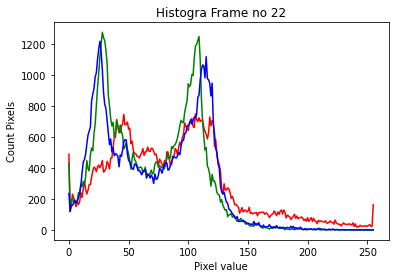

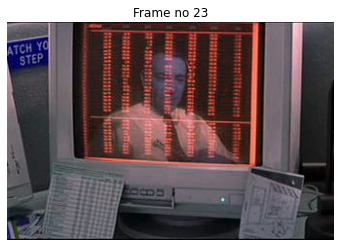

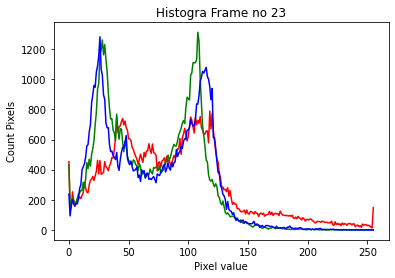

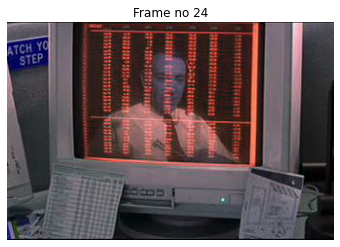

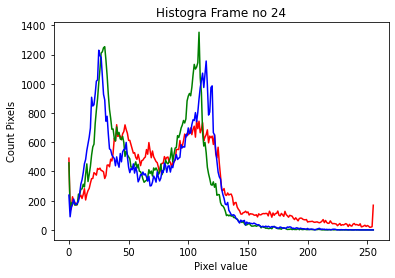

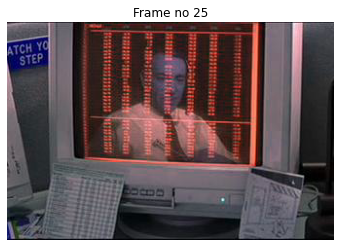

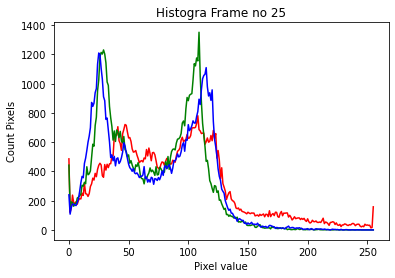

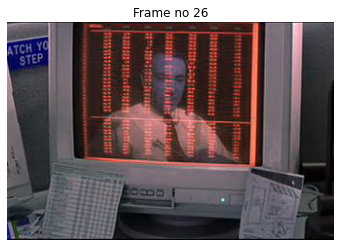

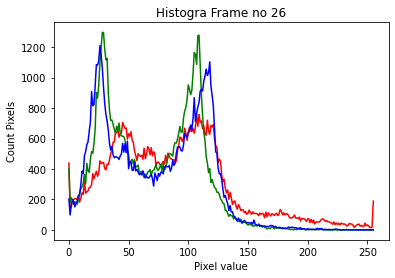

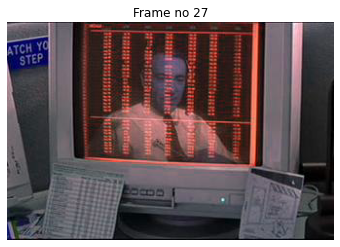

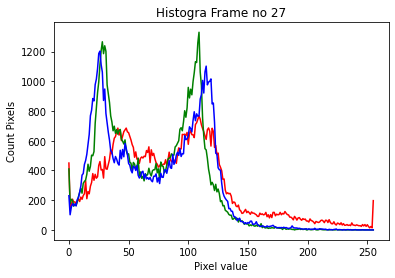

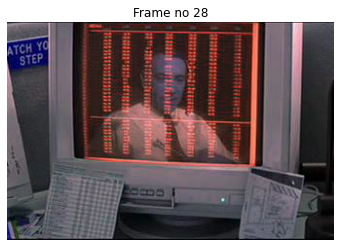

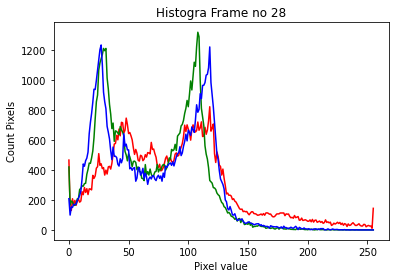

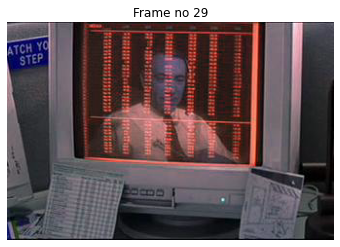

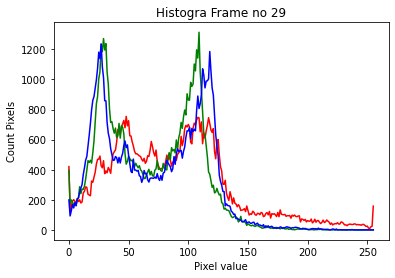

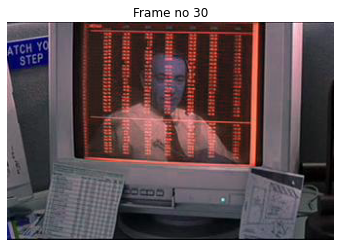

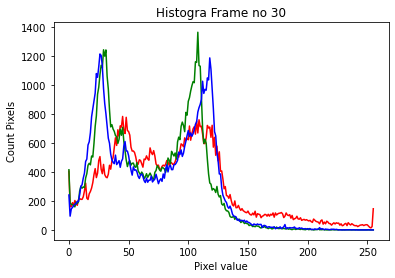

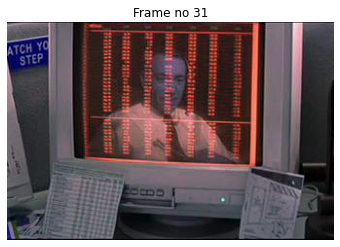

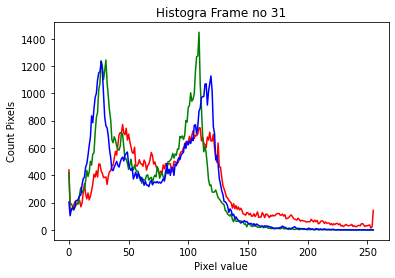

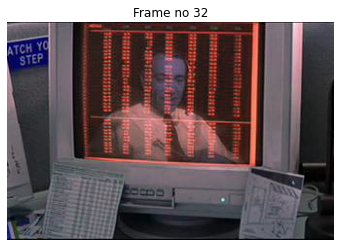

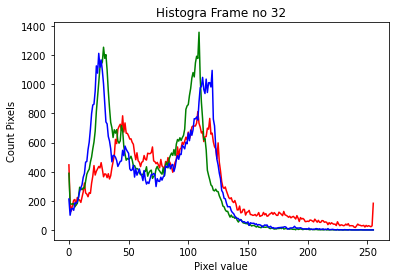

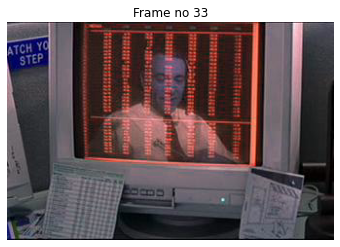

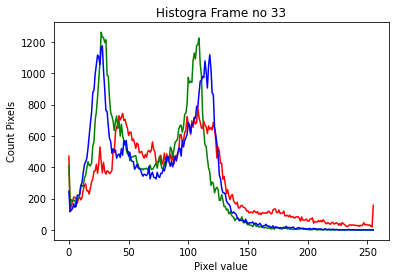

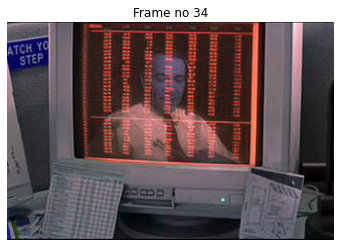

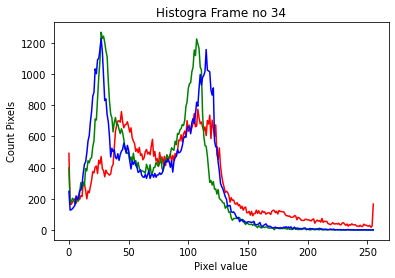

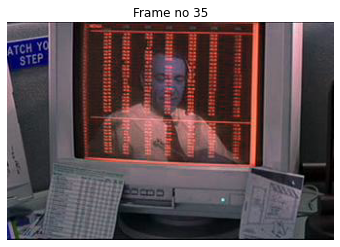

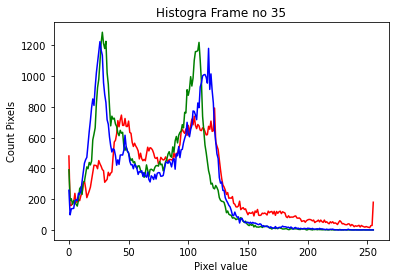

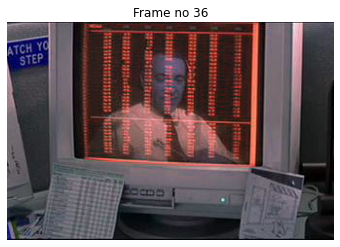

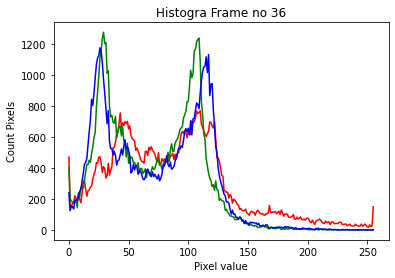

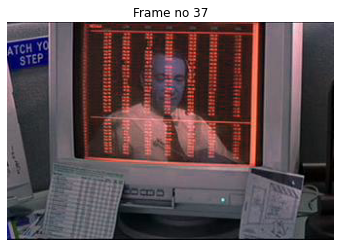

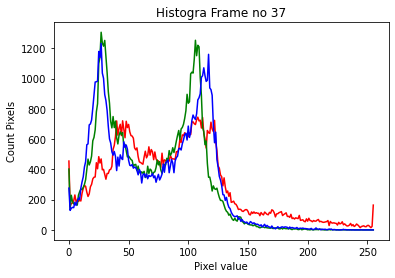

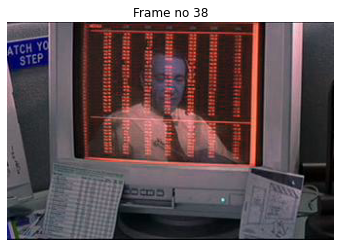

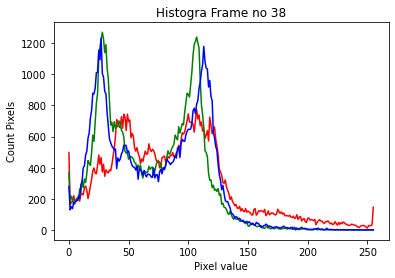

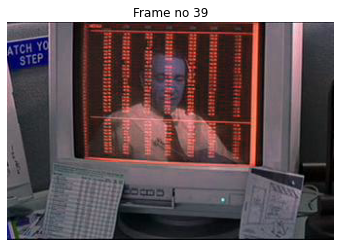

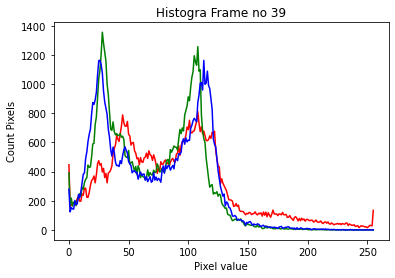

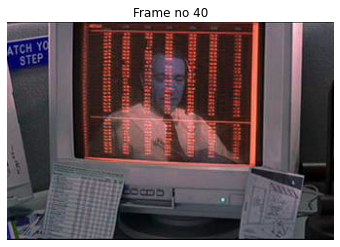

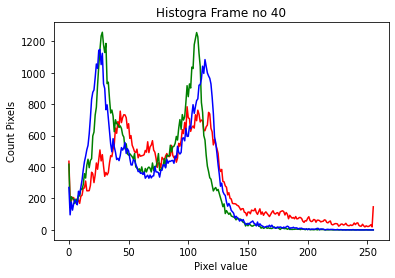

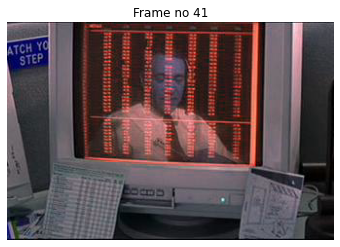

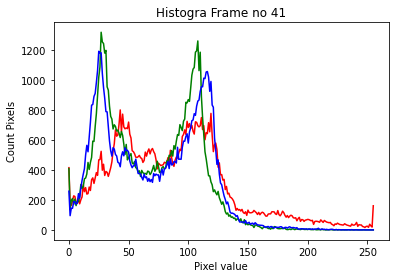

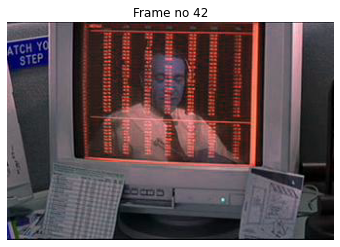

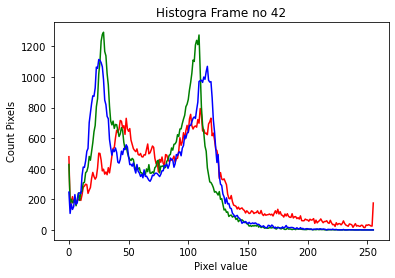

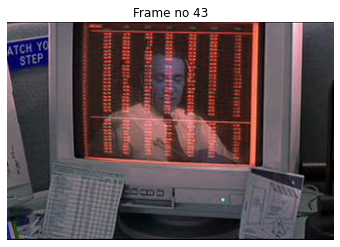

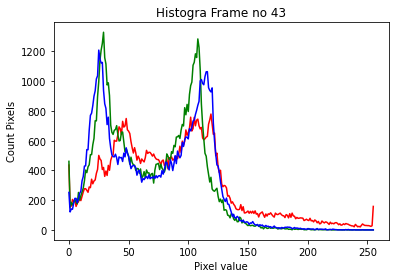

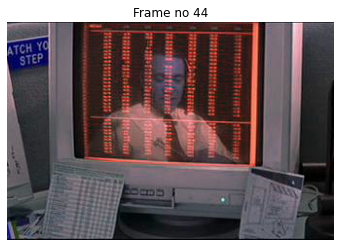

In [ ]:
segment_output_path =os.getcwd() + '\\segmented_output' #setting output image path
if not os.path.isdir(segment_output_path):
    os.mkdir(segment_output_path)

cap = cv2.VideoCapture('DatasetB.avi') #input video
count_frame = 1
count = 0
while(cap.isOpened()): #check if video is playing
    ret, frame = cap.read() #getting images framefrom video
    if ret == True: #check if input is valid
        #cv2.imshow('frame',frame)
        bins = np.arange(0,256) #creating empty array of pixel values from 0-255
        bins = bins.reshape(256,1).ravel()
    
        red_hist, green_hist, blue_hist = ICV_histogram(frame,bins) #getting histogram
        
        #if count%100 == 0:
        plt.axis('off')
        plt.imshow(frame)
        plt.title(f'Frame no {count_frame}')
        plt.savefig(segment_output_path+f"\\DatasetB.avi_Frame_{count_frame}.jpg")
        plt.show()
        plt.plot(bins, red_hist, color='red')
        plt.plot(bins, green_hist, color='green')
        plt.plot(bins, blue_hist, color='blue')
        plt.xlabel("Pixel value")
        plt.ylabel("Count Pixels")
        plt.title(f'Histogra Frame no {count_frame}')
        plt.savefig(segment_output_path+f"\\DatasetB.avi_histogram_Frame_{count_frame}.jpg")
        plt.show()
        count+=1
        count_frame+=1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()    


b) Write a function that returns the value of the intersection of a pair of histograms. For a given video
sequence, use the histogram intersection function to calculate the intersection between consecutive
frames (e.g. between It and It+1, between It+1 and It+2 and so on). Find how to normalize the
intersection. Does that change the results? Plot the intersection values over time and the normalised
intersection values, and save the corresponding figures. Show and comment the figures in the report.

In [5]:
def ICV_histogram_intersection(frame1, frame2):
    bins = np.arange(0,256)
    bins = bins.reshape(256,1)
    
    frame_1_red_hist, frame_1_green_hist, frame_1_blue_hist = ICV_histogram(frame1,bins)
    frame_2_red_hist, frame_2_green_hist, frame_2_blue_hist = ICV_histogram(frame2,bins)

    red_intersect = 0
    green_intersect = 0
    blue_intersect = 0
    
    for i in range(0,256):
        red_intersect += min(frame_1_red_hist[i],frame_2_red_hist[i])
        green_intersect += min(frame_1_green_hist[i],frame_2_green_hist[i])
        blue_intersect += min(frame_1_blue_hist[i],frame_2_blue_hist[i])
    
    return red_intersect, green_intersect, blue_intersect
    

In [6]:
frames = []

cap = cv2.VideoCapture('DatasetB.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        #cv2.imshow('frame',frame)
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows() 

In [7]:
red_intersects = []
green_intersects = []
blue_intersects = []

for i in range(1,len(frames)):
    red_intersect, green_intersect, blue_intersect = ICV_histogram_intersection(frames[i-1], frames[i])
    red_intersects.append(red_intersect)
    green_intersects.append(green_intersect)
    blue_intersects.append(blue_intersect)
    #print(f'Intersection between frame({i-1},{i}) Red={red_intersect} Blue={blue_intersect} Green={green_intersect}')
    
red_intersects = np.array(red_intersects)
green_intersects = np.array(green_intersects)
blue_intersects = np.array(blue_intersects)

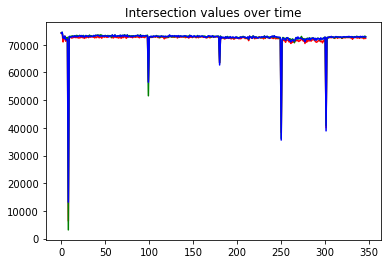

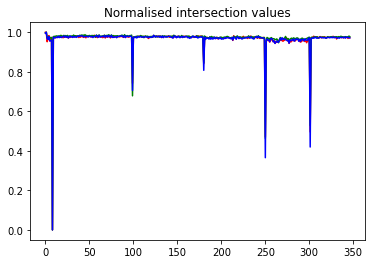

In [9]:
red_intersect_normalize = np.zeros((red_intersects.shape))
green_intersect_normalize = np.zeros((green_intersects.shape))
blue_intersect_normalize = np.zeros((blue_intersects.shape))
'''
red_intersect_normalize[:] = (red_intersects[:] - np.mean(red_intersects, axis = 0)) / np.std(red_intersects, axis = 0) 
green_intersect_normalize[:] = (green_intersects[:] - np.mean(green_intersects, axis = 0)) / np.std(green_intersects, axis = 0)
blue_intersect_normalize[:] = (blue_intersects[:] - np.mean(blue_intersects, axis = 0)) / np.std(blue_intersects, axis = 0)
'''
red_intersect_normalize[:] = (red_intersects[:] - np.min(red_intersects)) / (np.max(red_intersects) - np.min(red_intersects) )
green_intersect_normalize[:] = (green_intersects[:] - np.min(green_intersects)) / (np.max(green_intersects) - np.min(green_intersects) )
blue_intersect_normalize[:] = (blue_intersects[:] - np.min(blue_intersects)) /  (np.max(blue_intersects) - np.min(blue_intersects) )


plt.plot(range(red_intersects.shape[0]), red_intersects, color='red')
plt.plot(range(green_intersects.shape[0]), green_intersects, color='green')
plt.plot(range(blue_intersects.shape[0]), blue_intersects, color='blue')
plt.title('Intersection values over time')
plt.savefig(segment_output_path+"DatasetB_Intersection_values_over_time.jpg")
plt.show()


plt.plot(range(red_intersect_normalize.shape[0]), red_intersect_normalize, color='red')
plt.plot(range(green_intersect_normalize.shape[0]), green_intersect_normalize, color='green')
plt.plot(range(blue_intersect_normalize.shape[0]), blue_intersect_normalize, color='blue')
plt.title('Normalised intersection values')
plt.savefig(segment_output_path+"DatasetB_Normalized_Intersection_values_over_time.jpg")
plt.show()


c) Discuss in the report the following: What does the intersection value represent for a given input video?
Can you use it to make a decision about scene changes? How robust to changes in the video is the
histogram intersection? When does it fail? 